## Trending YouTube Video Statistics

- What are the features of the most popular trending YouTube videos?
- How many views do our trending videos have? Do most of them have a large number of views? Is having a large number of views required for a video to become trending?
- What are the lengths of trending video titles? Is this length related to the video becoming trendy?
- How are views, likes, dislikes, comment count, title length, and other attributes correlate with (relate to) each other? How are they connected?

## Columns description


Column Position | Column Name | Definition 
 --- | --- | --- 
 1 | video_id | ID
2 | trending_date | 
3 | title | 
4 | channel_title | 
5 | category_id | 
6 | publish_time | 
7 | tags | 
8 | views | 
9 | likes | 
10 | dislikes | 
11 | comment_count | 
12 | thumbnail_link | 
13 | comments_disabled | True or False
14 | ratings_disabled | True or False
15 | video_error_or_removed | True or False
16 | description | 


## Project Plan

'''Make a hypothesis about a correlation in a dataset and test the hypothesis using a statistical inference technique (such as the t-test).'''

Build a predictive model using one of the techniques covered in the course, i.e., ordinary least squares regression or Naïve Bayes.

1. Explore and clean data
2. Exploratory data analysis
3. Data Preparation 
   - Encode data
   - Split data
5. Classification Models Building
   - GaussianNB
   - Logistic regression
6. Model analysis and improvement
   - P-Val and correlation analysis
   - RandomForestClassifier
   - GridSearchCV
7. Features analysis and engineering
8. Outliers analysis
9. Feature reduction - income satisfaction
10. Clustering & PCA
   - Elbow analysis
   - Silhouette analysis 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
import datetime as dt
import seaborn as sns

In [81]:
df = pd.read_csv('CAvideos.csv')
df_categories = pd.read_json('CA_category_id.json')

In [57]:
df.head(5).T

,0,1,2,3,4
video_id,n1WpP7iowLc,0dBIkQ4Mz1M,5qpjK5DgCt4,d380meD0W0M,2Vv-BfVoq4g
trending_date,17.14.11,17.14.11,17.14.11,17.14.11,17.14.11
title,Eminem - Walk On Water (Audio) ft. Beyoncé,PLUSH - Bad Unboxing Fan Mail,"Racist Superman | Rudy Mancuso, King Bach & Le...",I Dare You: GOING BALD!?,Ed Sheeran - Perfect (Official Music Video)
channel_title,EminemVEVO,iDubbbzTV,Rudy Mancuso,nigahiga,Ed Sheeran
category_id,10,23,23,24,10
publish_time,2017-11-10T17:00:03.000Z,2017-11-13T17:00:00.000Z,2017-11-12T19:05:24.000Z,2017-11-12T18:01:41.000Z,2017-11-09T11:04:14.000Z
tags,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...","plush|""bad unboxing""|""unboxing""|""fan mail""|""id...","racist superman|""rudy""|""mancuso""|""king""|""bach""...","ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...","edsheeran|""ed sheeran""|""acoustic""|""live""|""cove..."
views,17158579,1014651,3191434,2095828,33523622
likes,787425,127794,146035,132239,1634130
dislikes,43420,1688,5339,1989,21082


## Explore Data

In [58]:
print('Shape:',df.shape)

Shape: (40881, 16)


In [59]:
print('-------------COLUMNS INFO---------------')
print(df.info())

-------------COLUMNS INFO---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  40881 non-null object
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB
None


In [60]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format= '%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

In [61]:
print('----------CATEGORICAL DESCRIPTION----------')
print(df.describe(include = np.object).T)

----------CATEGORICAL DESCRIPTION----------
                count unique  \
video_id        40881  24427   
title           40881  24573   
channel_title   40881   5076   
tags            40881  20157   
thumbnail_link  40881  24422   
description     39585  22345   

                                                              top  freq  
video_id                                              UceaB4D0jpo     8  
title                         Drake - God's Plan (Official Audio)    15  
channel_title                                           SET India   192  
tags                                                       [none]  2385  
thumbnail_link     https://i.ytimg.com/vi/l_lblj8Cq0o/default.jpg     8  
description     Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...   130  


In [62]:
print('-------------COLUMNS---------------')
print(df.columns)

-------------COLUMNS---------------
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [63]:
print('-------------INDEX---------------')
print(df.index)

-------------INDEX---------------
RangeIndex(start=0, stop=40881, step=1)


In [64]:
print('-------------DUPLICATES---------------')
print('Duplicates:',df.duplicated().any())

-------------DUPLICATES---------------
Duplicates: False


In [65]:
print('-------------MISSING DATA---------------')    
print(df.isnull().sum().sort_values(ascending=False))

-------------MISSING DATA---------------
description               1296
video_error_or_removed       0
ratings_disabled             0
comments_disabled            0
thumbnail_link               0
comment_count                0
dislikes                     0
likes                        0
views                        0
tags                         0
publish_time                 0
category_id                  0
channel_title                0
title                        0
trending_date                0
video_id                     0
dtype: int64


In [66]:
print('-------------UNIQUE DATA---------------')
print(df.apply(lambda x : len(x.unique())))

-------------UNIQUE DATA---------------
video_id                  24427
trending_date               205
title                     24573
channel_title              5076
category_id                  17
publish_time              23613
tags                      20157
views                     40170
likes                     24676
dislikes                   6241
comment_count             11172
thumbnail_link            24422
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               22346
dtype: int64


In [67]:
desc = df.describe()
desc.loc['Kurt'] = df.kurtosis()
desc.loc['Skew'] = df.skew()
desc.T

,count,mean,std,min,25%,50%,75%,max,Kurt,Skew
category_id,40881.0,2.079555e+01,6.775054e+00,1.0,20.0,24.0,24.0,43.0,2.241933,-1.580435
views,40881.0,1.147036e+06,3.390913e+06,733.0,143902.0,371204.0,963302.0,137843120.0,306.469597,13.487155
likes,40881.0,3.958269e+04,1.326895e+05,0.0,2191.0,8780.0,28717.0,5053338.0,302.729823,13.657294
dislikes,40881.0,2.009195e+03,1.900837e+04,0.0,99.0,303.0,950.0,1602383.0,4268.474365,58.668696
comment_count,40881.0,5.042975e+03,2.157902e+04,0.0,417.0,1301.0,3713.0,1114800.0,921.197195,25.156681


,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000


---------------------------------------------------------------------------
Highest correlation


comment_count  likes       0.836585
likes          views       0.828964
comment_count  views       0.693107
               dislikes    0.643494
dislikes       views       0.557621
dtype: float64

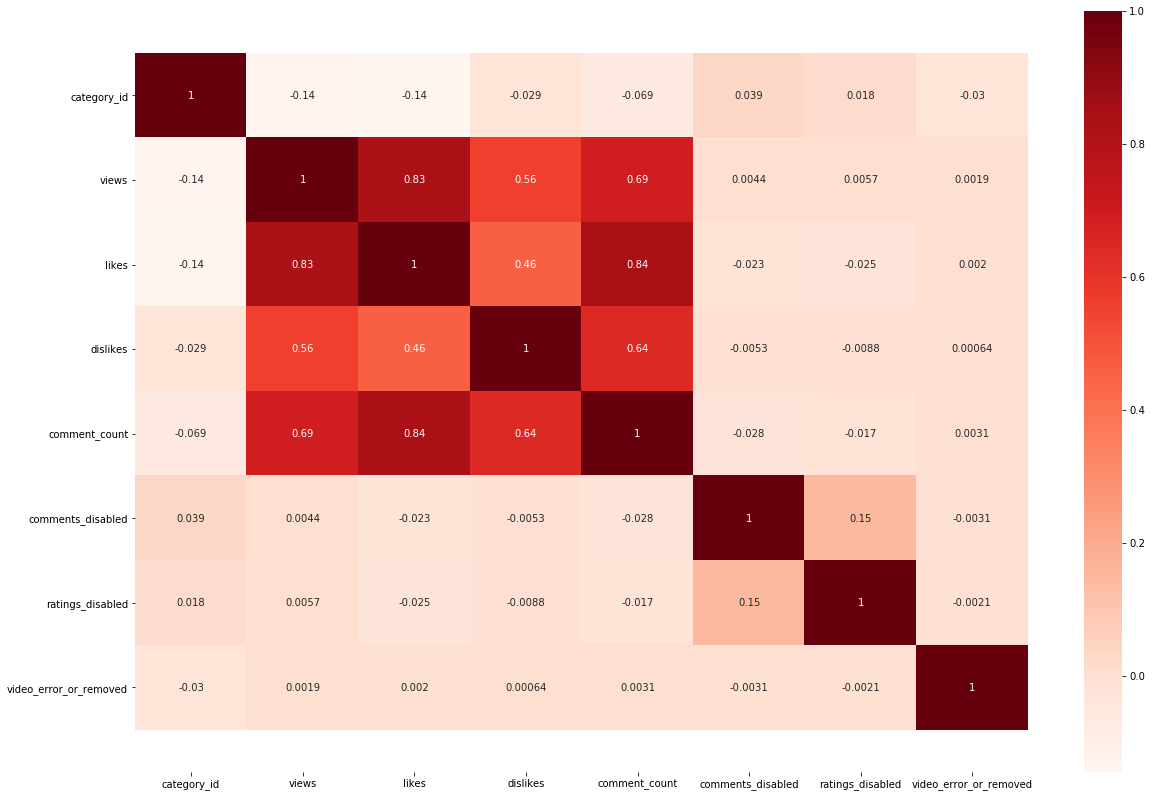

In [68]:
def ExploreCorrelation(df, significance, corr_map=False, cor_table=False):
    corr = df.corr()
    
    #Display correlation table
    if(cor_table): 
        display(corr)
    
    #Correlation heatmap
    if(corr_map):
        plt.figure(figsize=(20,14))
        ax = sns.heatmap(corr, annot=True, cmap=plt.cm.Reds) #notation: "annot" not "annote"
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
    
    print('-'*75)
    print('Highest correlation')
    
    
    #Filter significant correlation in upper triangle of the table 
    
    # remove values below index with NAN and then replace NAN with 0
    corr_upper = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))
    corr_upper = corr_upper.fillna(0)
    
    #unstack and sort dataframe
    corr_unstack = corr_upper.unstack()
    corr_sorted = corr_unstack.sort_values(kind="quicksort", ascending=False)
    #filter correlation by signifiance       
    corr_result = corr_sorted[((corr_sorted.values <1) & (corr_sorted.values >significance)) | (corr_sorted.values <-significance)]
    
    #Display all results
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(corr_result)
    
ExploreCorrelation(df,0.5, True, True)

In [69]:
cm = df[['likes', 'dislikes', 'comment_count', 'views']].corr()
cm

,likes,dislikes,comment_count,views
likes,1.000000,0.460427,0.836585,0.828964
dislikes,0.460427,1.000000,0.643494,0.557621
comment_count,0.836585,0.643494,1.000000,0.693107
views,0.828964,0.557621,0.693107,1.000000


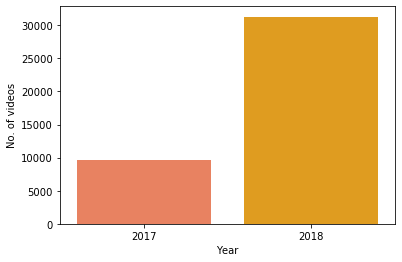

In [93]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [94]:
#the dataset was collected in 2017 and 2018 with 77% of it in 2018 and 23% in 2017.
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018    0.765368
2017    0.234632
Name: trending_date, dtype: float64

In [70]:
def CategoricalDescribe(df):   
    
    
    cat_describe = df.astype('object').describe()
    cat_describe.loc['percent'] = 100*cat_describe.loc['freq'] / cat_describe.loc['count']
    display(cat_describe.T)
    
CategoricalDescribe(df)

,count,unique,top,freq,percent
video_id,40881,24427,UceaB4D0jpo,8,0.019569
trending_date,40881,205,2018-01-20 00:00:00,200,0.489225
title,40881,24573,Drake - God's Plan (Official Audio),15,0.0366919
channel_title,40881,5076,SET India,192,0.469656
category_id,40881,17,24,13451,32.9028
publish_time,40881,23613,2017-12-20 23:00:00,11,0.0269074
tags,40881,20157,[none],2385,5.83401
views,40881,40170,183988,3,0.00733837
likes,40881,24676,0,284,0.694699
dislikes,40881,6241,0,393,0.961327


In [71]:
df.select_dtypes(include = [np.bool]).apply(pd.Series.value_counts)

,comments_disabled,ratings_disabled,video_error_or_removed
False,40298,40602,40854
True,583,279,27


# Data Cleaning

In [82]:
# remove video_id, description columns
df = df.drop(columns=['video_id', 'description', 'thumbnail_link'])

In [83]:
df["interaction_count"] = df["likes"]+df["dislikes"]
df["likes_per_view_percentage"] = df["likes"]/df["views"]*100
df["dislikes_per_view_percentage"] = df["dislikes"]/df["views"]*100
df["comment_count_per_view_percentage"] = df["comment_count"]/df["views"]*100
df["interaction_count_per_view_percentage"] = (df["likes"]+df["dislikes"])/df["views"]*100
df["date"] = pd.to_datetime(df["publish_time"]).dt.date
df["day"] = pd.to_datetime(df["publish_time"]).dt.day
df["weekday"] = pd.to_datetime(df["publish_time"]).dt.weekday_name
df["hour"] = pd.to_datetime(df["publish_time"]).dt.hour
df["minute"] = pd.to_datetime(df["publish_time"]).dt.minute
df["second"] = pd.to_datetime(df["publish_time"]).dt.second

In [84]:
categories = {int(category['id']): category['snippet']['title'] for category in df_categories['items']}
categories[29] = 'Nonprofits & Activism'

In [85]:
df["category_name"] = df["category_id"]
df = df.replace({"category_name": categories})

In [86]:
cat_count = df['category_id'].value_counts()
categories_list = []
for i in range(len(cat_count)):
    categories_list.append(categories[cat_count.index[i]])
print(categories_list)

['Entertainment', 'News & Politics', 'People & Blogs', 'Comedy', 'Music', 'Sports', 'Film & Animation', 'Howto & Style', 'Gaming', 'Science & Technology', 'Education', 'Travel & Events', 'Pets & Animals', 'Autos & Vehicles', 'Shows', 'Nonprofits & Activism', 'Movies']


In [87]:
numeric = ['views', 'likes', 'dislikes', 'comment_count', 'interaction_count']
categorical = ['channel_title', 'category_id', 'tags', 'category_name']

In [88]:
df_stat = df[numeric].describe().T
df_stat

,count,mean,std,min,25%,50%,75%,max
views,40881.0,1.147036e+06,3.390913e+06,733.0,143902.0,371204.0,963302.0,137843120.0
likes,40881.0,3.958269e+04,1.326895e+05,0.0,2191.0,8780.0,28717.0,5053338.0
dislikes,40881.0,2.009195e+03,1.900837e+04,0.0,99.0,303.0,950.0,1602383.0
comment_count,40881.0,5.042975e+03,2.157902e+04,0.0,417.0,1301.0,3713.0,1114800.0
interaction_count,40881.0,4.159188e+04,1.424444e+05,0.0,2423.0,9262.0,29902.0,5219192.0


In [46]:
x = df[['views', 'likes', 'dislikes', 'comment_count']]
y = df["views"]
model = sm.OLS(y,x.astype(float)).fit()
model.pvalues

views            0.000000e+00
likes            2.122503e-03
dislikes         1.944538e-23
comment_count    6.195033e-01
dtype: float64

In [3]:
df["interaction_count"] = df["likes"]+df["dislikes"]
df["likes_per_view_percentage"] = df["likes"]/df["views"]*100
CA_videos["dislikes_per_view_percentage"] = CA_videos["dislikes"]/CA_videos["views"]*100
CA_videos["comment_count_per_view_percentage"] = CA_videos["comment_count"]/CA_videos["views"]*100
CA_videos["interaction_count_per_view_percentage"] = (CA_videos["likes"]+CA_videos["dislikes"])/CA_videos["views"]*100
CA_videos["just_date"] = pd.to_datetime(CA_videos["publish_time"]).dt.date
CA_videos["just_day"] = pd.to_datetime(CA_videos["publish_time"]).dt.day
CA_videos["just_weekday"] = pd.to_datetime(CA_videos["publish_time"]).dt.weekday_name
CA_videos["just_hour"] = pd.to_datetime(CA_videos["publish_time"]).dt.hour
CA_videos["just_minute"] = pd.to_datetime(CA_videos["publish_time"]).dt.minute
CA_videos["just_second"] = pd.to_datetime(CA_videos["publish_time"]).dt.second

In [4]:
categories = {int(category['id']): category['snippet']['title'] for category in CA_videos_categories['items']}
categories[29] = 'Nonprofits & Activism'
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers',
 29: 'Nonprofits & Activism'}

In [5]:
CA_videos["category_name"] = CA_videos["category_id"]
CA_videos = CA_videos.replace({"category_name": categories})
cat_s = CA_videos['category_id'].value_counts()
categories_list = []
for i in range(len(cat_s)):
    categories_list.append(categories[cat_s.index[i]])
print(categories_list)

['Entertainment', 'News & Politics', 'People & Blogs', 'Comedy', 'Music', 'Sports', 'Film & Animation', 'Howto & Style', 'Gaming', 'Science & Technology', 'Education', 'Travel & Events', 'Pets & Animals', 'Autos & Vehicles', 'Shows', 'Nonprofits & Activism', 'Movies']


In [6]:
CA_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 28 columns):
video_id                                 40881 non-null object
trending_date                            40881 non-null object
title                                    40881 non-null object
channel_title                            40881 non-null object
category_id                              40881 non-null int64
publish_time                             40881 non-null object
tags                                     40881 non-null object
views                                    40881 non-null int64
likes                                    40881 non-null int64
dislikes                                 40881 non-null int64
comment_count                            40881 non-null int64
thumbnail_link                           40881 non-null object
comments_disabled                        40881 non-null bool
ratings_disabled                         40881 non-null bool
video_error_or_rem

In [7]:
CA_videos.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,dislikes_per_view_percentage,comment_count_per_view_percentage,interaction_count_per_view_percentage,just_date,just_day,just_weekday,just_hour,just_minute,just_second,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,0.253051,0.733639,4.842155,2017-11-10,10,Friday,17,0,3,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,0.166363,1.284185,12.761235,2017-11-13,13,Monday,17,0,0,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,0.167292,0.256342,4.743134,2017-11-12,12,Sunday,19,5,24,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,0.094903,0.835851,6.404533,2017-11-12,12,Sunday,18,1,41,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,0.062887,0.253752,4.937450,2017-11-09,9,Thursday,11,4,14,Music


In [8]:
CA_videos[["views","likes","dislikes","interaction_count","comment_count","likes_per_view_percentage","dislikes_per_view_percentage","interaction_count_per_view_percentage","comment_count_per_view_percentage"]].describe()

,views,likes,dislikes,interaction_count,comment_count,likes_per_view_percentage,dislikes_per_view_percentage,interaction_count_per_view_percentage,comment_count_per_view_percentage
count,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04,40881.000000,40881.000000,40881.000000,40881.000000
mean,1.147036e+06,3.958269e+04,2.009195e+03,4.159188e+04,5.042975e+03,3.341188,0.132381,3.473569,0.563067
std,3.390913e+06,1.326895e+05,1.900837e+04,1.424444e+05,2.157902e+04,3.077632,0.321985,3.115106,0.764852
min,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.439020e+05,2.191000e+03,9.900000e+01,2.423000e+03,4.170000e+02,0.939988,0.049934,1.048266,0.160261
50%,3.712040e+05,8.780000e+03,3.030000e+02,9.262000e+03,1.301000e+03,2.512198,0.080368,2.642039,0.363240
75%,9.633020e+05,2.871700e+04,9.500000e+02,2.990200e+04,3.713000e+03,4.823377,0.135348,4.981328,0.693183
max,1.378431e+08,5.053338e+06,1.602383e+06,5.219192e+06,1.114800e+06,45.050857,21.558033,45.279779,30.460041


In [9]:
#number of observations and their unique values
CA_videos.describe(include = np.object)

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,just_date,just_weekday,category_name
count,40881,40881,40881,40881,40881,40881,40881,39585,40881,40881,40881
unique,24427,205,24573,5076,23613,20157,24422,22345,267,7,17
top,UceaB4D0jpo,17.22.12,Most Popular Violin Covers of Popular Songs 20...,SET India,2017-12-20T23:00:00.000Z,[none],https://i.ytimg.com/vi/UceaB4D0jpo/default.jpg,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-01-29,Friday,Entertainment
freq,8,200,15,192,11,2385,8,130,385,7012,13451


In [10]:
CA_videos.groupby(["category_name"])[["views","likes","dislikes","interaction_count","comment_count","likes_per_view_percentage","dislikes_per_view_percentage","interaction_count_per_view_percentage","comment_count_per_view_percentage"]].mean()

,views,likes,dislikes,interaction_count,comment_count,likes_per_view_percentage,dislikes_per_view_percentage,interaction_count_per_view_percentage,comment_count_per_view_percentage
category_name,,,,,,,,,
Autos & Vehicles,5.667594e+05,13405.422096,560.271955,13965.694051,2878.719547,3.229439,0.106647,3.336086,0.645639
Comedy,9.828886e+05,51960.422475,1423.937185,53384.359661,5205.082428,5.195658,0.130007,5.325665,0.606336
Education,5.366028e+05,21162.867810,800.653885,21963.521695,2995.374369,4.402873,0.138986,4.541859,0.671839
Entertainment,1.016372e+06,28789.341536,1917.447253,30706.788789,4112.187644,2.682792,0.120744,2.803536,0.466697
Film & Animation,1.426729e+06,37767.962621,1510.319903,39278.282524,4896.394660,2.943493,0.110969,3.054462,0.478898
Gaming,9.237592e+05,38487.017857,1820.596726,40307.614583,7191.136161,4.949788,0.128412,5.078199,0.864272
Howto & Style,7.826839e+05,25502.293971,862.242152,26364.536124,4156.909317,5.032804,0.107689,5.140493,0.729130
Movies,2.853415e+06,42150.833333,2046.666667,44197.500000,2329.833333,2.125483,0.080693,2.206176,0.109295
Music,3.532525e+06,151285.856339,5922.859823,157208.716162,14053.940499,4.856156,0.146983,5.003140,0.446495


In [11]:
CA_videos.select_dtypes(include = [np.bool]).apply(pd.Series.value_counts)

,comments_disabled,ratings_disabled,video_error_or_removed
False,40298,40602,40854
True,583,279,27


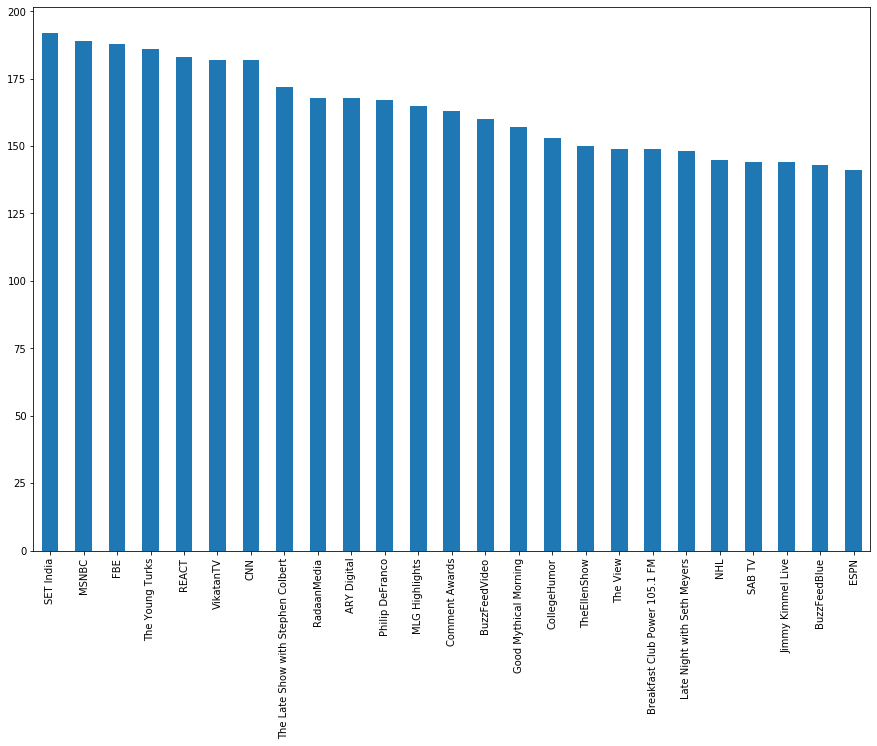

In [12]:
tmp = CA_videos.channel_title.value_counts()[:25]
#most infuential channels 
plt.figure(figsize=(15,10))
tmp.plot(kind = 'bar')

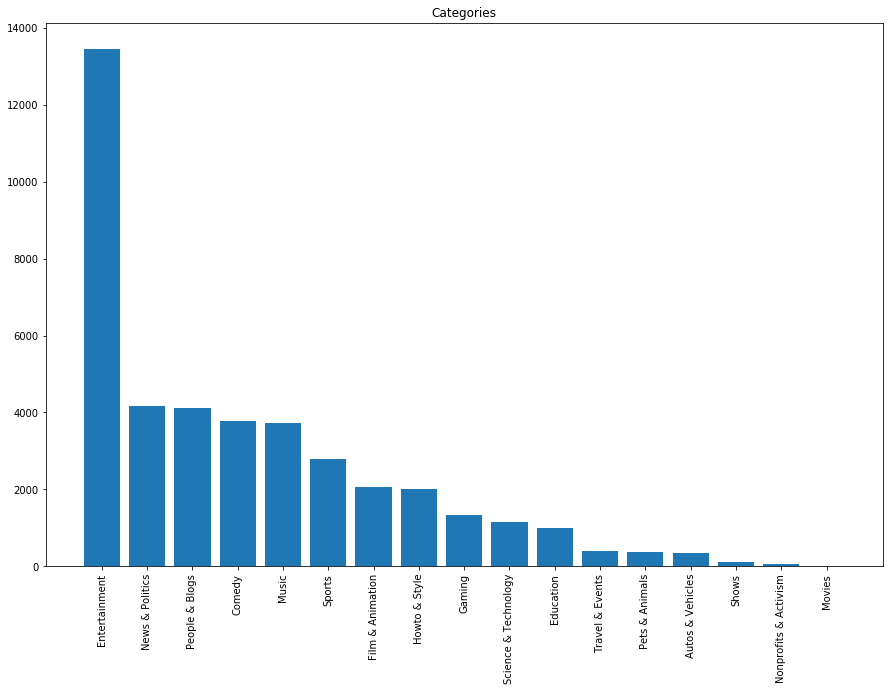

In [13]:
plt.figure(figsize=(15,10))
plt.bar(range(len(CA_videos['category_id'].value_counts())), CA_videos['category_id'].value_counts() , align='center')
plt.xticks(range(len(cat_s)), categories_list, rotation='vertical')
plt.title('Categories')
plt.show()

In [14]:
CA_videos.groupby(["just_weekday"])[["views","likes","dislikes","interaction_count","comment_count","likes_per_view_percentage","dislikes_per_view_percentage","interaction_count_per_view_percentage","comment_count_per_view_percentage"]].mean()

,views,likes,dislikes,interaction_count,comment_count,likes_per_view_percentage,dislikes_per_view_percentage,interaction_count_per_view_percentage,comment_count_per_view_percentage
just_weekday,,,,,,,,,
Friday,1.413055e+06,54469.948089,2183.555191,56653.503280,6651.194524,3.460735,0.120337,3.581073,0.571869
Monday,1.063861e+06,34011.372703,1650.966984,35662.339687,4113.366916,3.096867,0.126072,3.222939,0.525046
Saturday,9.087016e+05,31100.940179,1351.804534,32452.744713,4255.540865,3.128036,0.130665,3.258701,0.567315
Sunday,1.006757e+06,33978.525897,1590.391787,35568.917684,4391.221606,3.418113,0.133389,3.551502,0.590652
Thursday,1.183410e+06,42778.171760,2128.098052,44906.269812,4940.263768,3.531653,0.153960,3.685613,0.574793
Tuesday,1.120682e+06,35860.853197,1681.898210,37542.751407,4510.213299,3.255832,0.123698,3.379530,0.539710
Wednesday,1.250481e+06,40663.102229,3424.539242,44087.641472,6054.130687,3.462008,0.140987,3.602995,0.573470


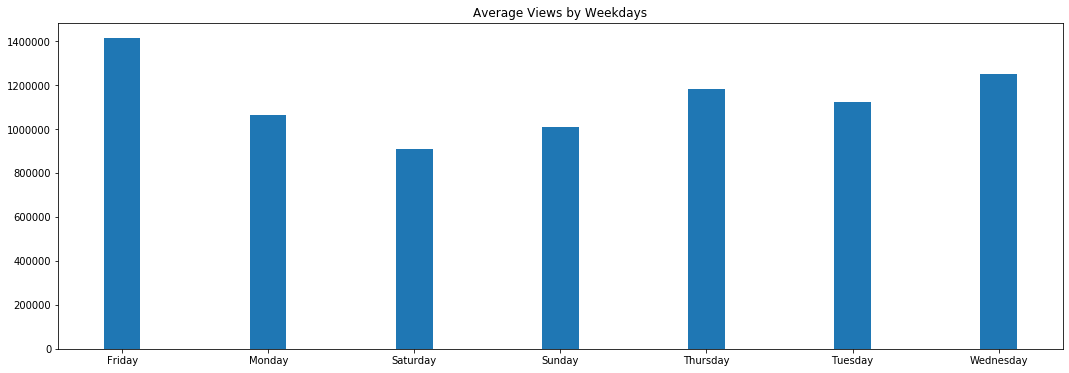

29.76
-16.55


In [15]:
just_weekday_views = tuple(CA_videos.groupby(["just_weekday"])["views"].mean())
ind = ['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
width = 0.25
fig, ax = plt.subplots(figsize=(18, 6))
just_weekday_views_chart = ax.bar(ind, just_weekday_views, width, align='center')
ax.set(title = 'Average Views by Weekdays')
plt.show()

just_weekday_views_avg_list = CA_videos.groupby(["just_weekday"])["views"].mean()
just_weekday_views_avg = sum( map( float, filter( None, just_weekday_views_avg_list[1:] ))) / ( len( just_weekday_views_avg_list ) - 1 )
just_weekday_views_max = max( just_weekday_views )
just_weekday_views_min = min( just_weekday_views )
just_weekday_views_change_percent = (( float( just_weekday_views_max ) - just_weekday_views_avg ) / just_weekday_views_avg ) * 100
just_weekday_views_change_percent_min = (( float( just_weekday_views_min ) - just_weekday_views_avg ) / just_weekday_views_avg ) * 100
print( round( just_weekday_views_change_percent, 2 ))
print( round( just_weekday_views_change_percent_min, 2 ))


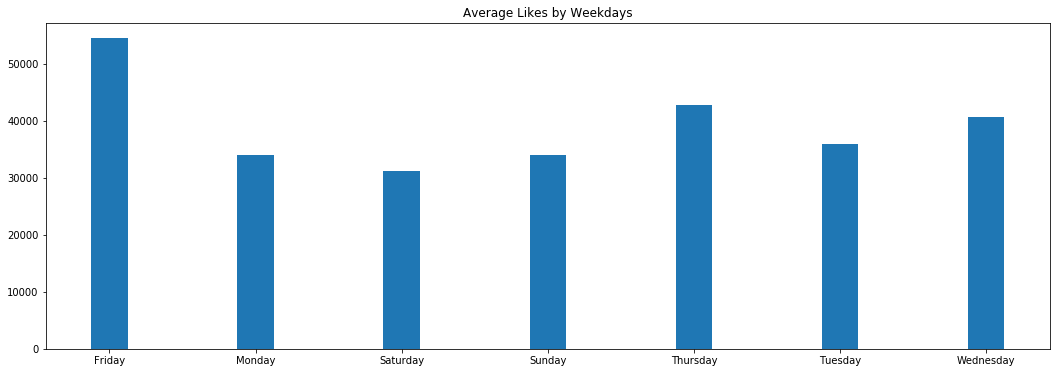

49.65
-14.56


In [16]:
just_weekday_likes = tuple(CA_videos.groupby(["just_weekday"])["likes"].mean())
ind = ['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
width = 0.25
fig, ax = plt.subplots(figsize=(18, 6))
just_weekday_likes_chart = ax.bar(ind, just_weekday_likes, width, align='center')
ax.set(title = 'Average Likes by Weekdays')
plt.show()

just_weekday_likes_avg_list = CA_videos.groupby(["just_weekday"])["likes"].mean()
just_weekday_likes_avg = sum( map( float, filter( None, just_weekday_likes_avg_list[1:] ))) / ( len( just_weekday_likes_avg_list ) - 1 )
just_weekday_likes_max = max( just_weekday_likes )
just_weekday_likes_min = min( just_weekday_likes )
just_weekday_likes_change_percent = (( float( just_weekday_likes_max ) - just_weekday_likes_avg ) / just_weekday_likes_avg ) * 100
just_weekday_likes_change_percent_min = (( float( just_weekday_likes_min ) - just_weekday_likes_avg ) / just_weekday_likes_avg ) * 100
print( round( just_weekday_likes_change_percent, 2 ))
print( round( just_weekday_likes_change_percent_min, 2 ))


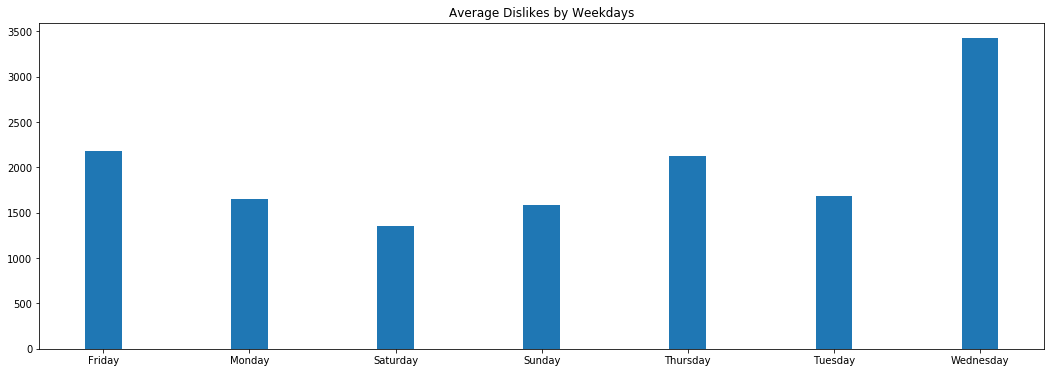

73.72
-31.43


In [17]:
just_weekday_dislikes = tuple(CA_videos.groupby(["just_weekday"])["dislikes"].mean())
ind = ['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
width = 0.25
fig, ax = plt.subplots(figsize=(18, 6))
just_weekday_dislikes_chart = ax.bar(ind, just_weekday_dislikes, width, align='center')
ax.set(title = 'Average Dislikes by Weekdays')
plt.show()

just_weekday_dislikes_avg_list = CA_videos.groupby(["just_weekday"])["dislikes"].mean()
just_weekday_dislikes_avg = sum( map( float, filter( None, just_weekday_dislikes_avg_list[1:] ))) / ( len( just_weekday_dislikes_avg_list ) - 1 )
just_weekday_dislikes_max = max( just_weekday_dislikes )
just_weekday_dislikes_min = min( just_weekday_dislikes )
just_weekday_dislikes_change_percent = (( float( just_weekday_dislikes_max ) - just_weekday_dislikes_avg ) / just_weekday_dislikes_avg ) * 100
just_weekday_dislikes_change_percent_min = (( float( just_weekday_dislikes_min ) - just_weekday_dislikes_avg ) / just_weekday_dislikes_avg ) * 100
print( round( just_weekday_dislikes_change_percent, 2 ))
print( round( just_weekday_dislikes_change_percent_min, 2 ))


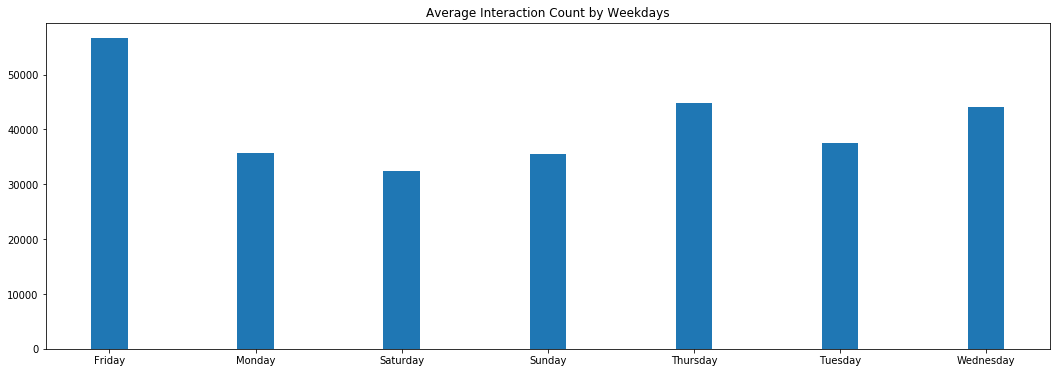

In [18]:
just_weekday_interaction_count = tuple(CA_videos.groupby(["just_weekday"])["interaction_count"].mean())
ind = ['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
width = 0.25
fig, ax = plt.subplots(figsize=(18, 6))
just_weekday_interacation_chart = ax.bar(ind, just_weekday_interaction_count, width, align='center')
ax.set(title = 'Average Interaction Count by Weekdays')
plt.show()

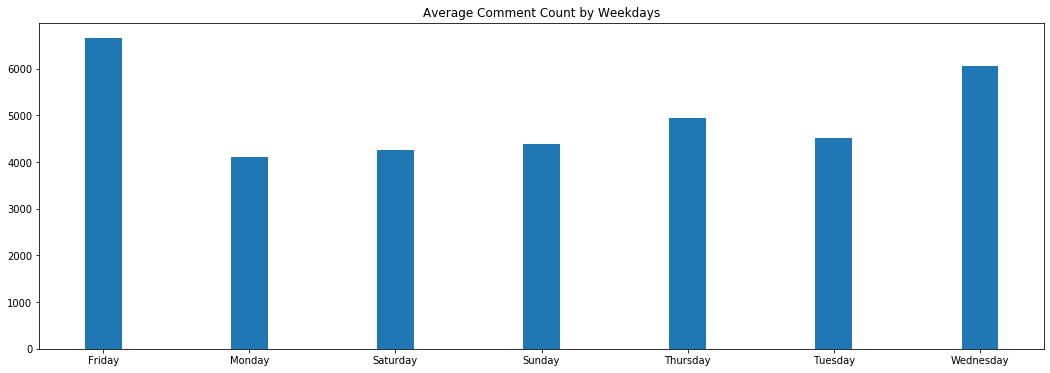

41.19
28.52


In [19]:
just_weekday_comment_count = tuple(CA_videos.groupby(["just_weekday"])["comment_count"].mean())
ind = ['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
width = 0.25
fig, ax = plt.subplots(figsize=(18, 6))
just_weekday_comment_count_chart = ax.bar(ind, just_weekday_comment_count, width, align='center')
ax.set(title = 'Average Comment Count by Weekdays')
plt.show()

just_weekday_comment_count_avg_list = CA_videos.groupby(["just_weekday"])["comment_count"].mean()
just_weekday_comment_count_avg = sum( map( float, filter( None, just_weekday_comment_count_avg_list[1:] ))) / ( len( just_weekday_comment_count_avg_list ) - 1 )
just_weekday_comment_count_max = max( just_weekday_comment_count )
just_weekday_comment_count_max_2 = just_weekday_comment_count[6]
just_weekday_comment_count_change_percent = (( float( just_weekday_comment_count_max ) - just_weekday_comment_count_avg ) / just_weekday_comment_count_avg ) * 100
just_weekday_comment_count_2_change_percent = (( float( just_weekday_comment_count_max_2 ) - just_weekday_comment_count_avg ) / just_weekday_comment_count_avg ) * 100
print( round( just_weekday_comment_count_change_percent, 2 ))
print( round( just_weekday_comment_count_2_change_percent, 2 ))


In [20]:
CA_videos.groupby(["just_hour"])[["views","likes","dislikes","interaction_count","comment_count","likes_per_view_percentage","dislikes_per_view_percentage","interaction_count_per_view_percentage","comment_count_per_view_percentage"]].mean()

,views,likes,dislikes,interaction_count,comment_count,likes_per_view_percentage,dislikes_per_view_percentage,interaction_count_per_view_percentage,comment_count_per_view_percentage
just_hour,,,,,,,,,
0,9.823300e+05,36876.233807,4208.855450,41085.089258,6158.497630,3.690340,0.203887,3.894227,0.753272
1,1.073117e+06,30390.174185,2301.506593,32691.680777,4780.421235,3.182737,0.144177,3.326914,0.681771
2,8.936016e+05,23261.373668,1135.588280,24396.961948,3891.563927,2.965188,0.134146,3.099334,0.676677
3,1.146501e+06,30408.685801,1738.297583,32146.983384,3873.921450,2.399205,0.150848,2.550053,0.499547
4,2.158562e+06,76158.435472,3038.338868,79196.774340,7295.264906,2.837501,0.125188,2.962689,0.433682
5,2.563636e+06,88170.901130,3492.485876,91663.387006,7141.723164,2.980576,0.114394,3.094970,0.385089
6,1.488243e+06,30670.403877,1817.802908,32488.206785,2893.928918,2.206582,0.101153,2.307734,0.302066
7,1.672217e+06,33730.454834,1689.760697,35420.215531,3129.805071,2.091777,0.111170,2.202947,0.286421
8,1.689870e+06,44679.753623,2187.247826,46867.001449,4000.672464,2.413492,0.111702,2.525193,0.347822


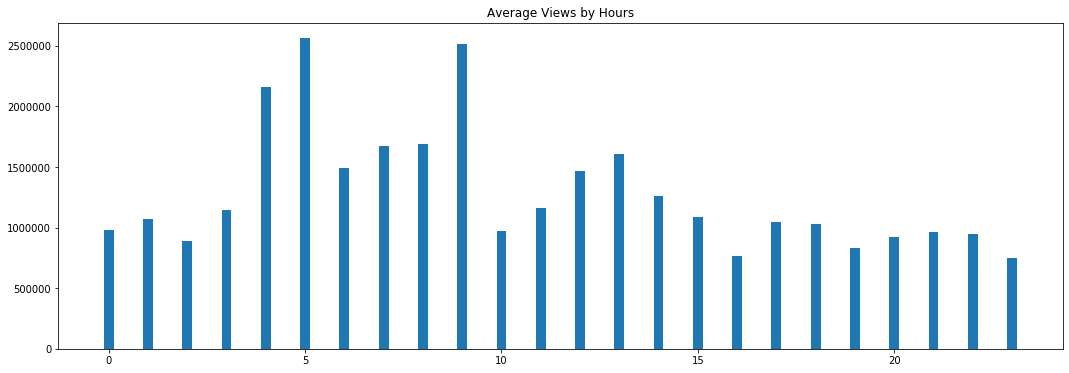

In [21]:
n_groups = len(CA_videos.groupby(["just_hour"]))
just_hour_views = tuple(CA_videos.groupby(["just_hour"])["views"].mean())
ind = np.arange(n_groups)
width = 0.25
fig, ax = plt.subplots(figsize=(18, 6))
just_hour_views_chart = ax.bar(ind, just_hour_views, width, align='center')
ax.set(title = 'Average Views by Hours')
plt.show()

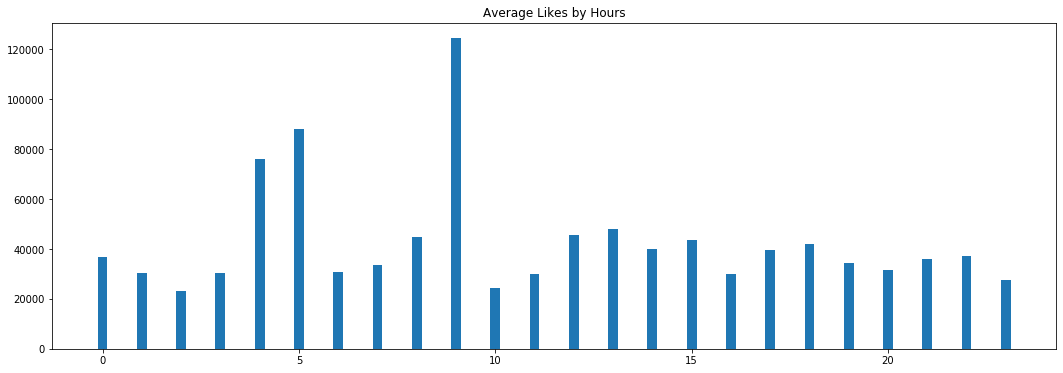

In [22]:
n_groups = len(CA_videos.groupby(["just_hour"]))
just_hour_likes = tuple(CA_videos.groupby(["just_hour"])["likes"].mean())
ind = np.arange(n_groups)
width = 0.25
fig, ax = plt.subplots(figsize=(18, 6))
just_hour_likes_chart = ax.bar(ind, just_hour_likes, width, align='center')
ax.set(title = 'Average Likes by Hours')
plt.show()

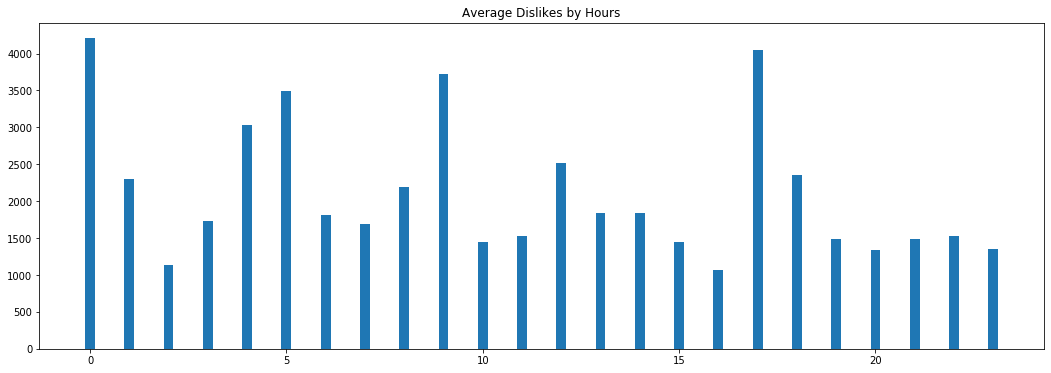

In [23]:
n_groups = len(CA_videos.groupby(["just_hour"]))
just_hour_dislikes = tuple(CA_videos.groupby(["just_hour"])["dislikes"].mean())
ind = np.arange(n_groups)
width = 0.25
fig, ax = plt.subplots(figsize=(18, 6))
just_hour_dislikes_chart = ax.bar(ind, just_hour_dislikes, width, align='center')
ax.set(title = 'Average Dislikes by Hours')
plt.show()

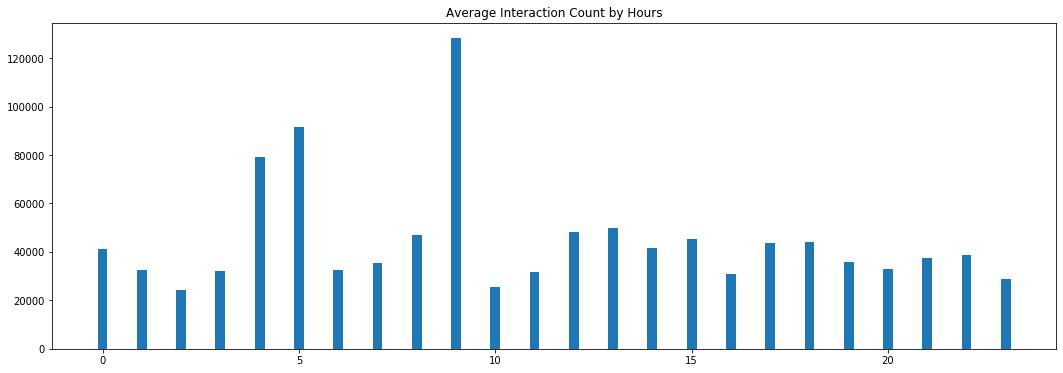

In [24]:
n_groups = len(CA_videos.groupby(["just_hour"]))
just_hour_interaction_count = tuple(CA_videos.groupby(["just_hour"])["interaction_count"].mean())
ind = np.arange(n_groups)
width = 0.25
fig, ax = plt.subplots(figsize=(18, 6))
just_hour_interacation_chart = ax.bar(ind, just_hour_interaction_count, width, align='center')
ax.set(title = 'Average Interaction Count by Hours')
plt.show()

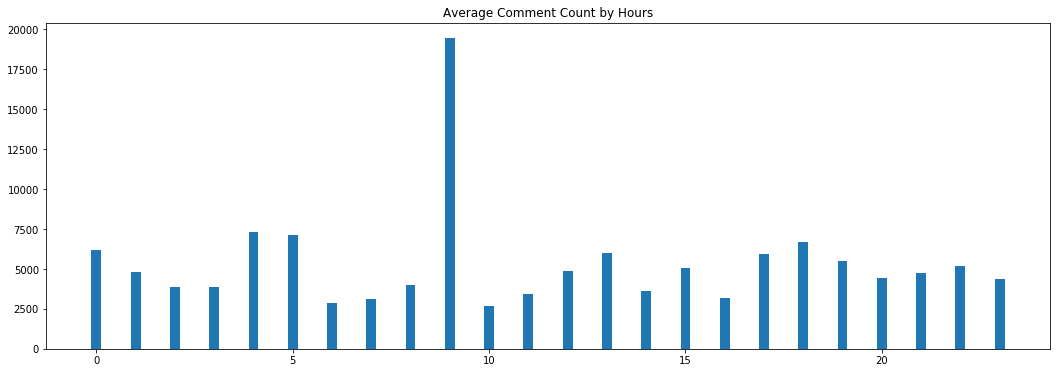

In [25]:
n_groups = len(CA_videos.groupby(["just_hour"]))
just_hour_comment_count = tuple(CA_videos.groupby(["just_hour"])["comment_count"].mean())
ind = np.arange(n_groups)
width = 0.25
fig, ax = plt.subplots(figsize=(18, 6))
just_hour_comment_count_chart = ax.bar(ind, just_hour_comment_count, width, align='center')
ax.set(title = 'Average Comment Count by Hours')
plt.show()

In [26]:
CA_videos.groupby(["comments_disabled"])[["views","likes","dislikes","interaction_count","comment_count","likes_per_view_percentage","dislikes_per_view_percentage","interaction_count_per_view_percentage","comment_count_per_view_percentage"]].mean()

,views,likes,dislikes,interaction_count,comment_count,likes_per_view_percentage,dislikes_per_view_percentage,interaction_count_per_view_percentage,comment_count_per_view_percentage
comments_disabled,,,,,,,,,
False,1.145231e+06,39950.666634,2021.271924,41971.938558,5115.932528,3.371082,0.131753,3.502835,0.571213
True,1.271769e+06,14147.365352,1174.447684,15321.813036,0.000000,1.274912,0.175800,1.450712,0.000000


In [27]:
CA_videos.groupby(["ratings_disabled"])[["views","likes","dislikes","interaction_count","comment_count","likes_per_view_percentage","dislikes_per_view_percentage","interaction_count_per_view_percentage","comment_count_per_view_percentage"]].mean()

,views,likes,dislikes,interaction_count,comment_count,likes_per_view_percentage,dislikes_per_view_percentage,interaction_count_per_view_percentage,comment_count_per_view_percentage
ratings_disabled,,,,,,,,,
False,1.145421e+06,39854.683956,2023.001798,41877.685754,5072.671962,3.364148,0.133291,3.497438,0.564324
True,1.382032e+06,0.000000,0.000000,0.000000,721.225806,0.000000,0.000000,0.000000,0.380060


In [28]:
CA_videos.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,interaction_count,likes_per_view_percentage,dislikes_per_view_percentage,comment_count_per_view_percentage,interaction_count_per_view_percentage,just_day,just_hour,just_minute,just_second
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002,-0.138311,-0.046861,0.023352,0.061178,-0.043884,0.004910,0.087370,-0.022743,0.004704
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928,0.846606,0.012055,0.044948,-0.054583,0.016556,-0.013955,-0.059321,0.000678,-0.007311
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953,0.992959,0.219817,0.065692,0.046398,0.223962,-0.008139,-0.027392,-0.032127,-0.022147
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636,0.562340,0.022794,0.250199,0.030464,0.048381,-0.012811,-0.016571,0.015714,0.018083
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117,0.865164,0.152789,0.130486,0.200622,0.164439,-0.007136,-0.006697,-0.009458,0.000473
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092,-0.022183,-0.080755,0.016220,-0.088548,-0.078107,-0.011022,-0.031556,0.025058,0.036520
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131,-0.024205,-0.089995,-0.034082,-0.019835,-0.092435,0.007979,-0.025954,0.013225,0.013852
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000,0.001904,-0.006399,-0.001828,-0.004960,-0.006511,-0.012718,0.000869,-0.000016,0.006924
interaction_count,-0.138311,0.846606,0.992959,0.562340,0.865164,-0.022183,-0.024205,0.001904,1.000000,0.207805,0.094581,0.047285,0.215081,-0.009291,-0.027728,-0.027830,-0.018217
likes_per_view_percentage,-0.046861,0.012055,0.219817,0.022794,0.152789,-0.080755,-0.089995,-0.006399,0.207805,1.000000,0.064780,0.471789,0.994666,0.002634,0.112531,-0.091400,-0.046295


Text(0.5, 1.0, 'Scatter Plot View and Like')

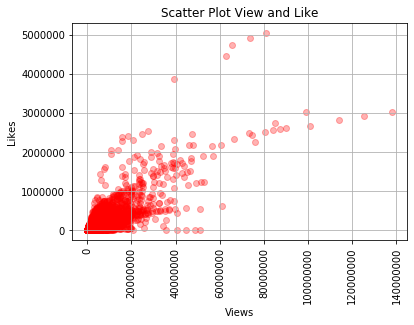

In [29]:
fig, ax = plt.subplots()
ax.scatter(CA_videos.views, CA_videos.likes, alpha = 0.3,color = 'red')
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation='vertical')
plt.xlabel('Views')     
plt.ylabel('Likes')
plt.grid()
plt.title('Scatter Plot View and Like') 

In [30]:
y = CA_videos.likes
X = CA_videos.views
X = sm.add_constant(X)
model_vl = sm.OLS(y, X).fit()
model_vl.summary()

C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                 8.980e+04
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:53:05   Log-Likelihood:            -5.1648e+05
No. Observations:               40881   AIC:                         1.033e+06
Df Residuals:                   40879   BIC:                         1.033e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2374.9879    387.484      6.129      0.000    1615.512    3134.464
views          0.0324      0.000    299.668      0.000       0.032       0.033
==============================================================================
Omnibus:                    58855.010   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        144905515.013
Skew:                           7.865   Prob(JB):                         0.00
Kurtosis:                     294.243   Cond. No.                     3.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
views_coeff, views_constant = model_vl.params
model_vl.params

const    2374.987879
views       0.032438
dtype: float64

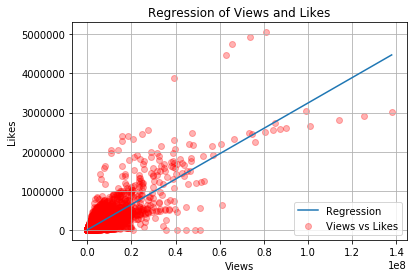

In [32]:
X_prime = np.linspace(X.views.min(), X.views.max(), 100)
X_prime = sm.add_constant(X_prime)

y_hat = model_vl.predict(X_prime)
plt.scatter(X.views, y, alpha = 0.3,color = 'red', label = 'Views vs Likes')
plt.title('Regression of Views and Likes') 
plt.grid()
plt.xlabel('Views')
plt.ylabel('Likes')
plt.plot(X_prime[:,1], y_hat, label = 'Regression')
plt.legend(loc='lower right')

In [33]:
def cap_data(df):

    for col in df.columns:
        
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

In [34]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [35]:
CA_videos_without_outlier = CA_videos.copy()

CA_videos_without_outlier = cap_data(CA_videos_without_outlier)


In [36]:
#Correlations without outliers
CA_videos_without_outlier.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,interaction_count,likes_per_view_percentage,dislikes_per_view_percentage,comment_count_per_view_percentage,interaction_count_per_view_percentage,just_day,just_hour,just_minute,just_second
category_id,1.000000,-0.194468,-0.190431,-0.135844,-0.129137,0.040130,0.019116,-0.030278,-0.189272,-0.038312,0.040953,0.073554,-0.035716,0.005319,0.085709,-0.017527,0.009312
views,-0.194468,1.000000,0.815704,0.765934,0.702680,-0.001629,-0.008719,0.004829,0.823348,0.023870,0.095485,-0.097784,0.028768,-0.019536,-0.063497,-0.006295,-0.011421
likes,-0.190431,0.815704,1.000000,0.730886,0.835869,-0.033036,-0.038726,0.005378,0.998011,0.334142,0.160412,0.067596,0.338656,-0.013151,-0.004253,-0.039449,-0.016173
dislikes,-0.135844,0.765934,0.730886,1.000000,0.746142,-0.013754,-0.032009,0.007457,0.760660,0.089900,0.475234,0.038626,0.125314,-0.016837,-0.048430,-0.012454,-0.002524
comment_count,-0.129137,0.702680,0.835869,0.746142,1.000000,-0.059504,-0.033964,0.010487,0.845908,0.287629,0.271384,0.302891,0.303059,-0.005225,0.012505,-0.025947,0.006494
comments_disabled,0.040130,-0.001629,-0.033036,-0.013754,-0.059504,1.000000,0.147903,-0.003092,-0.032261,-0.082977,0.009196,-0.110292,-0.080005,-0.011022,-0.031556,0.025058,0.036520
ratings_disabled,0.019116,-0.008719,-0.038726,-0.032009,-0.033964,0.147903,1.000000,-0.002131,-0.038745,-0.091528,-0.072283,-0.024423,-0.093139,0.007979,-0.025954,0.013225,0.013852
video_error_or_removed,-0.030278,0.004829,0.005378,0.007457,0.010487,-0.003092,-0.002131,1.000000,0.005427,-0.006397,-0.002047,-0.005575,-0.006497,-0.012718,0.000869,-0.000016,0.006924
interaction_count,-0.189272,0.823348,0.998011,0.760660,0.845908,-0.032261,-0.038745,0.005427,1.000000,0.324912,0.185957,0.069344,0.333029,-0.013448,-0.007697,-0.038299,-0.015142
likes_per_view_percentage,-0.038312,0.023870,0.334142,0.089900,0.287629,-0.082977,-0.091528,-0.006397,0.324912,1.000000,0.149518,0.544469,0.995448,0.003876,0.117809,-0.093559,-0.046743


Text(0.5, 1.0, 'Scatter Plot View and Like(Without outliers)')

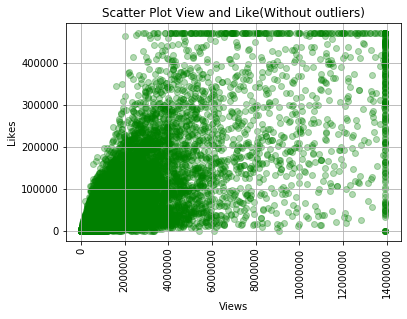

In [37]:
fig, ax = plt.subplots()
ax.scatter(CA_videos_without_outlier.views, CA_videos_without_outlier.likes, alpha = 0.3,color = 'g')
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation='vertical')
plt.xlabel('Views')     
plt.ylabel('Likes')
plt.grid()
plt.title('Scatter Plot View and Like(Without outliers)') 

In [38]:
y1 = CA_videos_without_outlier.likes
X1 = CA_videos_without_outlier.views
X1 = sm.add_constant(X1)
model_vl_without_outlier = sm.OLS(y1, X1).fit()
model_vl_without_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 8.128e+04
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:53:06   Log-Likelihood:            -4.9365e+05
No. Observations:               40881   AIC:                         9.873e+05
Df Residuals:                   40879   BIC:                         9.873e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3741.9112    235.798     15.869      0.000    3279.742    4204.080
views          0.0298      0.000    285.103      0.000       0.030       0.030
==============================================================================
Omnibus:                    17067.122   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           807157.802
Skew:                           1.269   Prob(JB):                         0.00
Kurtosis:                      24.620   Cond. No.                     2.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

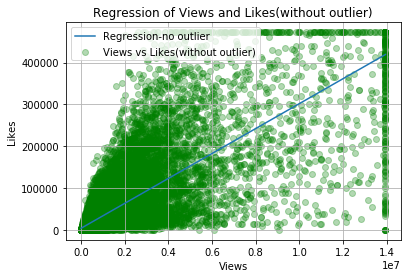

In [39]:
X_prime_no = np.linspace(X1.views.min(), X1.views.max(), 100)
X_prime_no = sm.add_constant(X_prime_no)

y_hat1 = model_vl_without_outlier.predict(X_prime_no)
plt.scatter(X1.views, y1, alpha = 0.3,color = 'g', label = 'Views vs Likes(without outlier)')
plt.title('Regression of Views and Likes(without outlier)') 
plt.grid()
plt.xlabel('Views')
plt.ylabel('Likes')
plt.plot(X_prime_no[:,1], y_hat1, label = 'Regression-no outlier')
plt.legend(loc='upper left')

In [40]:
views_no_coeff, views_no_constant = model_vl_without_outlier.params
model_vl_without_outlier.params

const    3741.911187
views       0.029836
dtype: float64

(0, 500000)

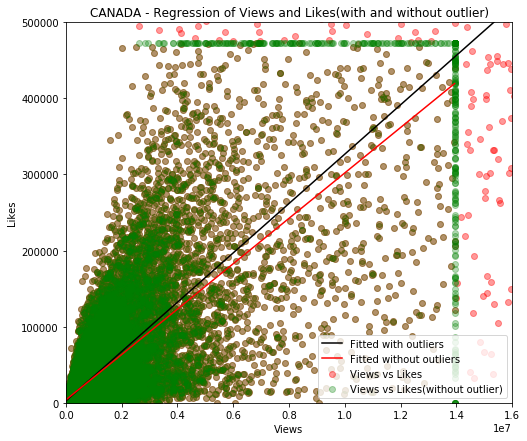

In [41]:
plt.figure(figsize=(8,7))
X_prime = np.linspace(X.views.min(), X.views.max(), 100)
X_prime = sm.add_constant(X_prime)

y_hat = model_vl.predict(X_prime)
plt.scatter(X.views, y, alpha = 0.4,color = 'red', label = 'Views vs Likes')
plt.grid()
plt.xlabel('Views')
plt.ylabel('Likes')
plt.plot(X_prime[:,1], y_hat, label = 'Fitted with outliers', color = 'k')
plt.legend(loc='lower right')


X_prime_no = np.linspace(X1.views.min(), X1.views.max(), 100)
X_prime_no = sm.add_constant(X_prime_no)

y_hat1 = model_vl_without_outlier.predict(X_prime_no)
plt.scatter(X1.views, y1, alpha = 0.3,color = 'g', label = 'Views vs Likes(without outlier)')
plt.title('CANADA - Regression of Views and Likes(with and without outlier)') 
plt.grid()
plt.plot(X_prime_no[:,1], y_hat1, label = 'Fitted without outliers', color = 'red')
plt.legend(loc='lower right')
plt.xlim(0, 16000000)
plt.ylim(0, 500000)

Text(0.5, 1.0, 'Scatter Plot View and Dislike')

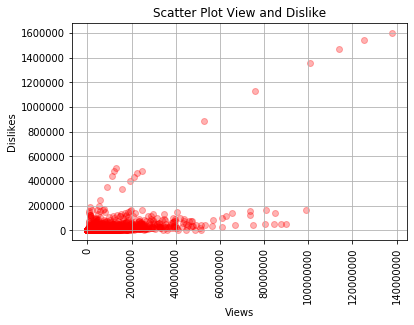

In [42]:
fig, ax = plt.subplots()
ax.scatter(CA_videos.views, CA_videos.dislikes, alpha = 0.3,color = 'red')
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation='vertical')
plt.xlabel('Views')     
plt.ylabel('Dislikes')
plt.grid()
plt.title('Scatter Plot View and Dislike') 

In [43]:
y = CA_videos.dislikes
X = CA_videos.views
X = sm.add_constant(X)
model_vd = sm.OLS(y, X).fit()
model_vd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               dislikes   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                 1.845e+04
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:53:08   Log-Likelihood:            -4.5318e+05
No. Observations:               40881   AIC:                         9.064e+05
Df Residuals:                   40879   BIC:                         9.064e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1576.2610     82.384    -19.133      0.000   -1737.736   -1414.786
views          0.0031    2.3e-05    135.819      0.000       0.003       0.003
==============================================================================
Omnibus:                   123818.600   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      15069526658.768
Skew:                          44.999   Prob(JB):                         0.00
Kurtosis:                    2976.006   Cond. No.                     3.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
views_coeff, views_constant = model_vd.params

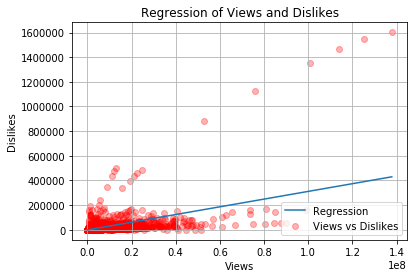

In [45]:
X_prime = np.linspace(X.views.min(), X.views.max(), 100)
X_prime = sm.add_constant(X_prime)

y_hat = model_vd.predict(X_prime)
plt.scatter(X.views, y, alpha = 0.3,color = 'red', label = 'Views vs Dislikes')
plt.title('Regression of Views and Dislikes') 
plt.grid()
plt.xlabel('Views')
plt.ylabel('Dislikes')
plt.plot(X_prime[:,1], y_hat, label = 'Regression')
plt.legend(loc='lower right')


In [46]:
def cap_data(df):

    for col in df.columns:
        
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df


In [47]:
CA_videos_without_outlier = CA_videos.copy()
CA_videos_without_outlier = cap_data(CA_videos_without_outlier)

In [48]:
#Correlations without outliers
CA_videos_without_outlier.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,interaction_count,likes_per_view_percentage,dislikes_per_view_percentage,comment_count_per_view_percentage,interaction_count_per_view_percentage,just_day,just_hour,just_minute,just_second
category_id,1.000000,-0.194468,-0.190431,-0.135844,-0.129137,0.040130,0.019116,-0.030278,-0.189272,-0.038312,0.040953,0.073554,-0.035716,0.005319,0.085709,-0.017527,0.009312
views,-0.194468,1.000000,0.815704,0.765934,0.702680,-0.001629,-0.008719,0.004829,0.823348,0.023870,0.095485,-0.097784,0.028768,-0.019536,-0.063497,-0.006295,-0.011421
likes,-0.190431,0.815704,1.000000,0.730886,0.835869,-0.033036,-0.038726,0.005378,0.998011,0.334142,0.160412,0.067596,0.338656,-0.013151,-0.004253,-0.039449,-0.016173
dislikes,-0.135844,0.765934,0.730886,1.000000,0.746142,-0.013754,-0.032009,0.007457,0.760660,0.089900,0.475234,0.038626,0.125314,-0.016837,-0.048430,-0.012454,-0.002524
comment_count,-0.129137,0.702680,0.835869,0.746142,1.000000,-0.059504,-0.033964,0.010487,0.845908,0.287629,0.271384,0.302891,0.303059,-0.005225,0.012505,-0.025947,0.006494
comments_disabled,0.040130,-0.001629,-0.033036,-0.013754,-0.059504,1.000000,0.147903,-0.003092,-0.032261,-0.082977,0.009196,-0.110292,-0.080005,-0.011022,-0.031556,0.025058,0.036520
ratings_disabled,0.019116,-0.008719,-0.038726,-0.032009,-0.033964,0.147903,1.000000,-0.002131,-0.038745,-0.091528,-0.072283,-0.024423,-0.093139,0.007979,-0.025954,0.013225,0.013852
video_error_or_removed,-0.030278,0.004829,0.005378,0.007457,0.010487,-0.003092,-0.002131,1.000000,0.005427,-0.006397,-0.002047,-0.005575,-0.006497,-0.012718,0.000869,-0.000016,0.006924
interaction_count,-0.189272,0.823348,0.998011,0.760660,0.845908,-0.032261,-0.038745,0.005427,1.000000,0.324912,0.185957,0.069344,0.333029,-0.013448,-0.007697,-0.038299,-0.015142
likes_per_view_percentage,-0.038312,0.023870,0.334142,0.089900,0.287629,-0.082977,-0.091528,-0.006397,0.324912,1.000000,0.149518,0.544469,0.995448,0.003876,0.117809,-0.093559,-0.046743


Text(0.5, 1.0, 'Scatter Plot View and Dislikes(Without outliers)')

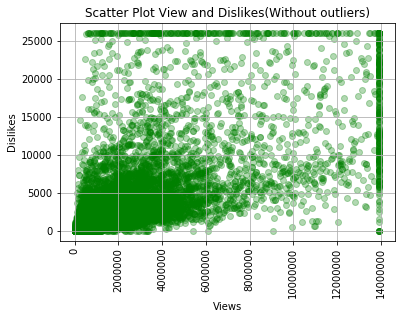

In [49]:
fig, ax = plt.subplots()
ax.scatter(CA_videos_without_outlier.views, CA_videos_without_outlier.dislikes, alpha = 0.3,color = 'g')
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation='vertical')
plt.xlabel('Views')     
plt.ylabel('Dislikes')
plt.grid()
plt.title('Scatter Plot View and Dislikes(Without outliers)') 

In [50]:
y1 = CA_videos_without_outlier.dislikes
X1 = CA_videos_without_outlier.views
X1 = sm.add_constant(X1)
model_vd_without_outlier = sm.OLS(y1, X1).fit()
model_vd_without_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               dislikes   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                 5.802e+04
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:53:10   Log-Likelihood:            -3.7545e+05
No. Observations:               40881   AIC:                         7.509e+05
Df Residuals:                   40879   BIC:                         7.509e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.9584     13.087     -1.296      0.195     -42.609       8.692
views          0.0014   5.81e-06    240.871      0.000       0.001       0.001
==============================================================================
Omnibus:                    36444.634   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2595046.310
Skew:                           4.009   Prob(JB):                         0.00
Kurtosis:                      41.199   Cond. No.                     2.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

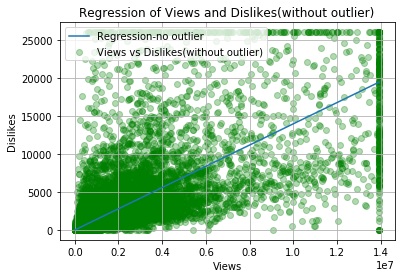

In [51]:
X_prime_no = np.linspace(X1.views.min(), X1.views.max(), 100)
X_prime_no = sm.add_constant(X_prime_no)

y_hat1 = model_vd_without_outlier.predict(X_prime_no)
plt.scatter(X1.views, y1, alpha = 0.3,color = 'g', label = 'Views vs Dislikes(without outlier)')
plt.title('Regression of Views and Dislikes(without outlier)') 
plt.grid()
plt.xlabel('Views')
plt.ylabel('Dislikes')
plt.plot(X_prime_no[:,1], y_hat1, label = 'Regression-no outlier')
plt.legend(loc='upper left')

In [52]:
views_no_coeff, views_no_constant = model_vd_without_outlier.params

(0, 30000)

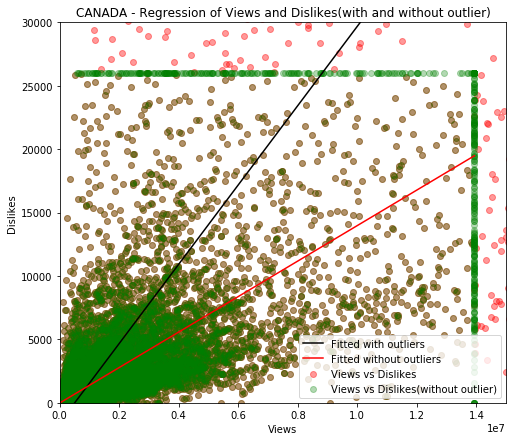

In [53]:
plt.figure(figsize=(8, 7))
X_prime = np.linspace(X.views.min(), X.views.max(), 100)
X_prime = sm.add_constant(X_prime)

y_hat = model_vd.predict(X_prime)
plt.scatter(X.views, y, alpha = 0.4,color = 'red', label = 'Views vs Dislikes')

plt.grid()
plt.xlabel('Views')
plt.ylabel('Dislikes')
plt.plot(X_prime[:,1], y_hat, label = 'Fitted with outliers', color = 'k')
plt.legend(loc='lower right')


X_prime_no = np.linspace(X1.views.min(), X1.views.max(), 100)
X_prime_no = sm.add_constant(X_prime_no)

y_hat1 = model_vd_without_outlier.predict(X_prime_no)
plt.scatter(X1.views, y1, alpha = 0.3,color = 'g', label = 'Views vs Dislikes(without outlier)')
plt.title('CANADA - Regression of Views and Dislikes(with and without outlier)') 
plt.grid()

plt.plot(X_prime_no[:,1], y_hat1, label = 'Fitted without outliers', color = 'r')
plt.legend(loc='lower right')
plt.xlim(0, 15000000)
plt.ylim(0, 30000)

Text(0.5, 1.0, 'Scatter Plot View and Interaction')

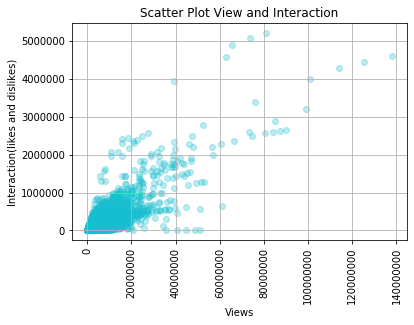

In [54]:
fig, ax = plt.subplots()
ax.scatter(CA_videos.views, CA_videos.interaction_count, alpha = 0.3, color = '#17becf')
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation='vertical')
plt.xlabel('Views')     
plt.ylabel('Interaction(likes and dislikes)')
plt.grid()
plt.title('Scatter Plot View and Interaction') 

In [55]:
y = CA_videos.interaction_count
X = CA_videos.views
X = sm.add_constant(X)
model_vi = sm.OLS(y, X).fit()
model_vi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      interaction_count   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                 1.034e+05
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:53:12   Log-Likelihood:            -5.1735e+05
No. Observations:               40881   AIC:                         1.035e+06
Df Residuals:                   40879   BIC:                         1.035e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        798.7268    395.828      2.018      0.044      22.894    1574.559
views          0.0356      0.000    321.618      0.000       0.035       0.036
==============================================================================
Omnibus:                    55103.387   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        119940113.124
Skew:                           6.876   Prob(JB):                         0.00
Kurtosis:                     267.998   Cond. No.                     3.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
views_coeff, views_constant = model_vi.params

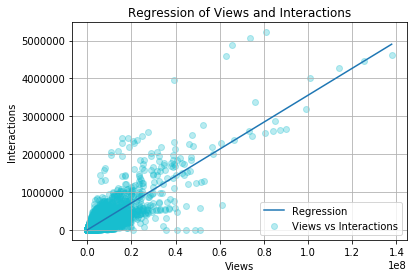

In [57]:
X_prime = np.linspace(X.views.min(), X.views.max(), 100)
X_prime = sm.add_constant(X_prime)
y_hat = model_vi.predict(X_prime)
plt.scatter(X.views, y, alpha = 0.3,color = '#17becf', label = 'Views vs Interactions')
plt.title('Regression of Views and Interactions') 
plt.grid()
plt.xlabel('Views')
plt.ylabel('Interactions')
plt.plot(X_prime[:,1], y_hat, label = 'Regression')
plt.legend(loc='lower right')

In [58]:
def cap_data(df):

    for col in df.columns:
        
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df


In [59]:
CA_videos_without_outlier = CA_videos.copy()
CA_videos_without_outlier = cap_data(CA_videos_without_outlier)

In [60]:
#Correlations without outliers
CA_videos_without_outlier.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,interaction_count,likes_per_view_percentage,dislikes_per_view_percentage,comment_count_per_view_percentage,interaction_count_per_view_percentage,just_day,just_hour,just_minute,just_second
category_id,1.000000,-0.194468,-0.190431,-0.135844,-0.129137,0.040130,0.019116,-0.030278,-0.189272,-0.038312,0.040953,0.073554,-0.035716,0.005319,0.085709,-0.017527,0.009312
views,-0.194468,1.000000,0.815704,0.765934,0.702680,-0.001629,-0.008719,0.004829,0.823348,0.023870,0.095485,-0.097784,0.028768,-0.019536,-0.063497,-0.006295,-0.011421
likes,-0.190431,0.815704,1.000000,0.730886,0.835869,-0.033036,-0.038726,0.005378,0.998011,0.334142,0.160412,0.067596,0.338656,-0.013151,-0.004253,-0.039449,-0.016173
dislikes,-0.135844,0.765934,0.730886,1.000000,0.746142,-0.013754,-0.032009,0.007457,0.760660,0.089900,0.475234,0.038626,0.125314,-0.016837,-0.048430,-0.012454,-0.002524
comment_count,-0.129137,0.702680,0.835869,0.746142,1.000000,-0.059504,-0.033964,0.010487,0.845908,0.287629,0.271384,0.302891,0.303059,-0.005225,0.012505,-0.025947,0.006494
comments_disabled,0.040130,-0.001629,-0.033036,-0.013754,-0.059504,1.000000,0.147903,-0.003092,-0.032261,-0.082977,0.009196,-0.110292,-0.080005,-0.011022,-0.031556,0.025058,0.036520
ratings_disabled,0.019116,-0.008719,-0.038726,-0.032009,-0.033964,0.147903,1.000000,-0.002131,-0.038745,-0.091528,-0.072283,-0.024423,-0.093139,0.007979,-0.025954,0.013225,0.013852
video_error_or_removed,-0.030278,0.004829,0.005378,0.007457,0.010487,-0.003092,-0.002131,1.000000,0.005427,-0.006397,-0.002047,-0.005575,-0.006497,-0.012718,0.000869,-0.000016,0.006924
interaction_count,-0.189272,0.823348,0.998011,0.760660,0.845908,-0.032261,-0.038745,0.005427,1.000000,0.324912,0.185957,0.069344,0.333029,-0.013448,-0.007697,-0.038299,-0.015142
likes_per_view_percentage,-0.038312,0.023870,0.334142,0.089900,0.287629,-0.082977,-0.091528,-0.006397,0.324912,1.000000,0.149518,0.544469,0.995448,0.003876,0.117809,-0.093559,-0.046743


Text(0.5, 1.0, 'Scatter Plot View and Interactions(Without outliers)')

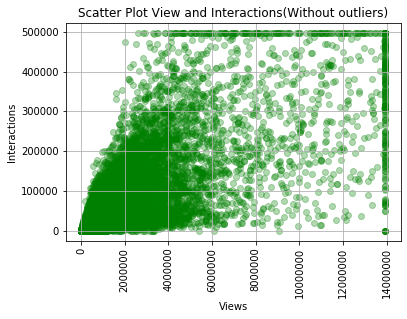

In [61]:
fig, ax = plt.subplots()
ax.scatter(CA_videos_without_outlier.views, CA_videos_without_outlier.interaction_count, alpha = 0.3,color = 'g')
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation='vertical')
plt.xlabel('Views')     
plt.ylabel('Interactions')
plt.grid()
plt.title('Scatter Plot View and Interactions(Without outliers)') 

In [62]:
y1 = CA_videos_without_outlier.interaction_count
X1 = CA_videos_without_outlier.views
X1 = sm.add_constant(X1)
model_vi_without_outlier = sm.OLS(y1, X1).fit()
model_vi_without_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      interaction_count   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 8.604e+04
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:53:13   Log-Likelihood:            -4.9473e+05
No. Observations:               40881   AIC:                         9.895e+05
Df Residuals:                   40879   BIC:                         9.895e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3638.2826    242.105     15.028      0.000    3163.752    4112.813
views          0.0315      0.000    293.319      0.000       0.031       0.032
==============================================================================
Omnibus:                    17395.037   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           811477.264
Skew:                           1.313   Prob(JB):                         0.00
Kurtosis:                      24.668   Cond. No.                     2.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

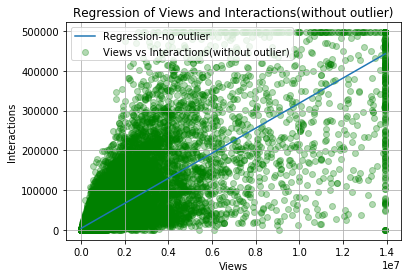

In [63]:
X_prime_no = np.linspace(X1.views.min(), X1.views.max(), 100)
X_prime_no = sm.add_constant(X_prime_no)

y_hat1 = model_vi_without_outlier.predict(X_prime_no)
plt.scatter(X1.views, y1, alpha = 0.3,color = 'g', label = 'Views vs Interactions(without outlier)')
plt.title('Regression of Views and Interactions(without outlier)') 
plt.grid()
plt.xlabel('Views')
plt.ylabel('Interactions')
plt.plot(X_prime_no[:,1], y_hat1, label = 'Regression-no outlier')
plt.legend(loc='upper left')

(0, 550000)

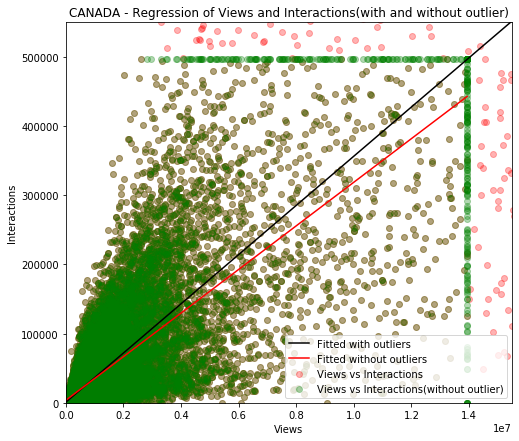

In [64]:
plt.figure(figsize=(8, 7))
X_prime = np.linspace(X.views.min(), X.views.max(), 100)
X_prime = sm.add_constant(X_prime)
y_hat = model_vi.predict(X_prime)
plt.scatter(X.views, y, alpha = 0.3,color = 'r', label = 'Views vs Interactions')

plt.grid()
plt.xlabel('Views')
plt.ylabel('Interactions')
plt.plot(X_prime[:,1], y_hat, label = 'Fitted with outliers', color = 'k')
plt.legend(loc='lower right')


X_prime_no = np.linspace(X1.views.min(), X1.views.max(), 100)
X_prime_no = sm.add_constant(X_prime_no)

y_hat1 = model_vi_without_outlier.predict(X_prime_no)
plt.scatter(X1.views, y1, alpha = 0.3,color = 'g', label = 'Views vs Interactions(without outlier)')
plt.title('CANADA - Regression of Views and Interactions(with and without outlier)') 
plt.grid()

plt.plot(X_prime_no[:,1], y_hat1, label = 'Fitted without outliers', color = 'red')
plt.legend(loc='lower right')
plt.xlim(0, 15500000)
plt.ylim(0, 550000)

Text(0.5, 1.0, 'Scatter Plot View and Comment count')

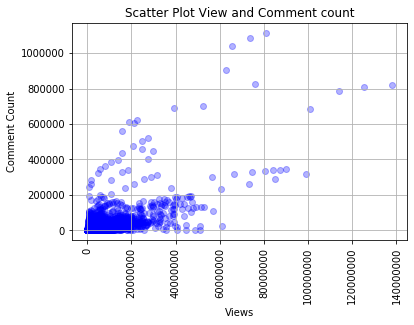

In [65]:
fig, ax = plt.subplots()
ax.scatter(CA_videos.views, CA_videos.comment_count, alpha = 0.3,color = 'b')
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation='vertical')
plt.xlabel('Views')     
plt.ylabel('Comment Count')
plt.grid()
plt.title('Scatter Plot View and Comment count')

In [66]:
y = CA_videos.comment_count
X = CA_videos.views
X = sm.add_constant(X)
model_vc = sm.OLS(y, X).fit()
model_vc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comment_count   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                 3.779e+04
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:53:15   Log-Likelihood:            -4.5260e+05
No. Observations:               40881   AIC:                         9.052e+05
Df Residuals:                   40879   BIC:                         9.052e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.3448     81.215     -0.201      0.841    -175.529     142.839
views          0.0044   2.27e-05    194.408      0.000       0.004       0.004
==============================================================================
Omnibus:                    90345.732   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1028714456.234
Skew:                          20.184   Prob(JB):                         0.00
Kurtosis:                     779.078   Cond. No.                     3.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
views_coeff, views_constant = model_vc.params

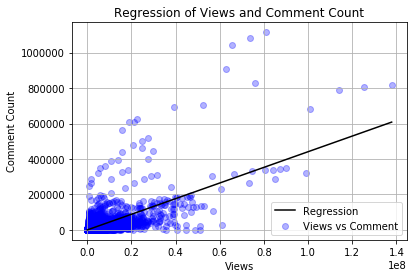

In [68]:
X_prime = np.linspace(X.views.min(), X.views.max(), 100)
X_prime = sm.add_constant(X_prime)

y_hat = model_vc.predict(X_prime)
plt.scatter(X.views, y, alpha = 0.3,color = 'b', label = 'Views vs Comment')
plt.title('Regression of Views and Comment Count') 
plt.grid()
plt.xlabel('Views')
plt.ylabel('Comment Count')
plt.plot(X_prime[:,1], y_hat, label = 'Regression', color = 'k')
plt.legend(loc='lower right')

In [69]:
def cap_data(df):

    for col in df.columns:
        
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

In [70]:
CA_videos_without_outlier = CA_videos.copy()
CA_videos_without_outlier = cap_data(CA_videos_without_outlier)

In [71]:
#Correlations without outliers
CA_videos_without_outlier.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,interaction_count,likes_per_view_percentage,dislikes_per_view_percentage,comment_count_per_view_percentage,interaction_count_per_view_percentage,just_day,just_hour,just_minute,just_second
category_id,1.000000,-0.194468,-0.190431,-0.135844,-0.129137,0.040130,0.019116,-0.030278,-0.189272,-0.038312,0.040953,0.073554,-0.035716,0.005319,0.085709,-0.017527,0.009312
views,-0.194468,1.000000,0.815704,0.765934,0.702680,-0.001629,-0.008719,0.004829,0.823348,0.023870,0.095485,-0.097784,0.028768,-0.019536,-0.063497,-0.006295,-0.011421
likes,-0.190431,0.815704,1.000000,0.730886,0.835869,-0.033036,-0.038726,0.005378,0.998011,0.334142,0.160412,0.067596,0.338656,-0.013151,-0.004253,-0.039449,-0.016173
dislikes,-0.135844,0.765934,0.730886,1.000000,0.746142,-0.013754,-0.032009,0.007457,0.760660,0.089900,0.475234,0.038626,0.125314,-0.016837,-0.048430,-0.012454,-0.002524
comment_count,-0.129137,0.702680,0.835869,0.746142,1.000000,-0.059504,-0.033964,0.010487,0.845908,0.287629,0.271384,0.302891,0.303059,-0.005225,0.012505,-0.025947,0.006494
comments_disabled,0.040130,-0.001629,-0.033036,-0.013754,-0.059504,1.000000,0.147903,-0.003092,-0.032261,-0.082977,0.009196,-0.110292,-0.080005,-0.011022,-0.031556,0.025058,0.036520
ratings_disabled,0.019116,-0.008719,-0.038726,-0.032009,-0.033964,0.147903,1.000000,-0.002131,-0.038745,-0.091528,-0.072283,-0.024423,-0.093139,0.007979,-0.025954,0.013225,0.013852
video_error_or_removed,-0.030278,0.004829,0.005378,0.007457,0.010487,-0.003092,-0.002131,1.000000,0.005427,-0.006397,-0.002047,-0.005575,-0.006497,-0.012718,0.000869,-0.000016,0.006924
interaction_count,-0.189272,0.823348,0.998011,0.760660,0.845908,-0.032261,-0.038745,0.005427,1.000000,0.324912,0.185957,0.069344,0.333029,-0.013448,-0.007697,-0.038299,-0.015142
likes_per_view_percentage,-0.038312,0.023870,0.334142,0.089900,0.287629,-0.082977,-0.091528,-0.006397,0.324912,1.000000,0.149518,0.544469,0.995448,0.003876,0.117809,-0.093559,-0.046743


Text(0.5, 1.0, 'Scatter Plot View and Comment Count(Without outliers)')

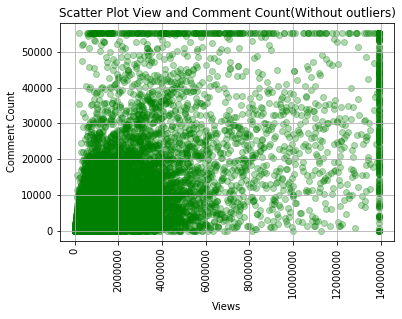

In [72]:
fig, ax = plt.subplots()
ax.scatter(CA_videos_without_outlier.views, CA_videos_without_outlier.comment_count, alpha = 0.3,color = 'g')
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation='vertical')
plt.xlabel('Views')     
plt.ylabel('Comment Count')
plt.grid()
plt.title('Scatter Plot View and Comment Count(Without outliers)') 

In [73]:
y1 = CA_videos_without_outlier.comment_count
X1 = CA_videos_without_outlier.views
X1 = sm.add_constant(X1)
model_vc_without_outlier = sm.OLS(y1, X1).fit()
model_vc_without_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comment_count   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 3.987e+04
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:53:16   Log-Likelihood:            -4.1391e+05
No. Observations:               40881   AIC:                         8.278e+05
Df Residuals:                   40879   BIC:                         8.278e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1153.8216     33.527     34.414      0.000    1088.107    1219.536
views          0.0030   1.49e-05    199.677      0.000       0.003       0.003
==============================================================================
Omnibus:                    27963.400   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           897843.751
Skew:                           2.864   Prob(JB):                         0.00
Kurtosis:                      25.233   Cond. No.                     2.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

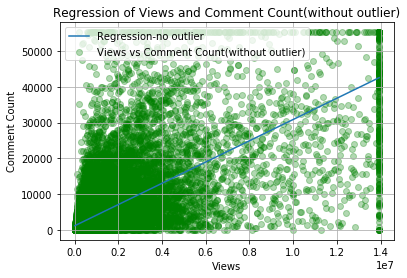

In [74]:
X_prime_no = np.linspace(X1.views.min(), X1.views.max(), 100)
X_prime_no = sm.add_constant(X_prime_no)

y_hat1 = model_vc_without_outlier.predict(X_prime_no)
plt.scatter(X1.views, y1, alpha = 0.3,color = 'g', label = 'Views vs Comment Count(without outlier)')
plt.title('Regression of Views and Comment Count(without outlier)') 
plt.grid()
plt.xlabel('Views')
plt.ylabel('Comment Count')
plt.plot(X_prime_no[:,1], y_hat1, label = 'Regression-no outlier')
plt.legend(loc='upper left')

(0, 60000)

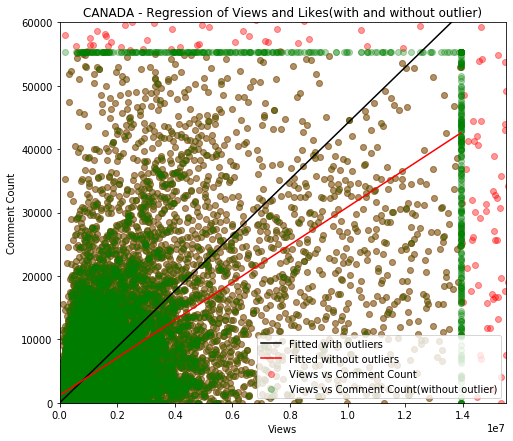

In [75]:
plt.figure(figsize=(8, 7))
X_prime = np.linspace(X.views.min(), X.views.max(), 100)
X_prime = sm.add_constant(X_prime)

y_hat = model_vc.predict(X_prime)
plt.scatter(X.views, y, alpha = 0.4,color = 'red', label = 'Views vs Comment Count')
 
plt.grid()
plt.xlabel('Views')
plt.ylabel('Comment Count')
plt.plot(X_prime[:,1], y_hat, label = 'Fitted with outliers', color = 'k')
plt.legend(loc='lower right')


X_prime_no = np.linspace(X1.views.min(), X1.views.max(), 100)
X_prime_no = sm.add_constant(X_prime_no)

y_hat1 = model_vc_without_outlier.predict(X_prime_no)
plt.scatter(X1.views, y1, alpha = 0.3,color = 'g', label = 'Views vs Comment Count(without outlier)')
plt.title('CANADA - Regression of Views and Likes(with and without outlier)') 
plt.grid()

plt.plot(X_prime_no[:,1], y_hat1, label = 'Fitted without outliers', color = 'red')
plt.legend(loc='lower right')
plt.xlim(0, 15500000)
plt.ylim(0, 60000)

In [76]:
X = CA_videos[['views', 'likes', 'dislikes', 'interaction_count', 'comment_count']]
y = CA_videos['category_name']

X.head(10)

def ratio(x):
    a,b = x
    if b == 0:
        return a
    return a/b

X['ratioLD'] = X[['likes','dislikes']].apply(ratio, axis=1)

X['ratioC/V'] = X[['comment_count','views']].apply(ratio, axis=1)

In [77]:
X_scaled = preprocessing.scale(X)

In [78]:
X_train, X_split, y_train, y_split = train_test_split(X_scaled, y, test_size=0.40)
X_cv, X_test, y_cv, y_test = train_test_split(X_split, y_split, test_size=0.5)

In [79]:
logreg = linear_model.LogisticRegression().fit(X_train,y_train)
LRpred = logreg.predict(X_cv)

In [80]:
LRaccuracy = accuracy_score(LRpred,y_cv)
LRaccuracy

0.34173189823874756

In [81]:
kneigh = KNeighborsClassifier(48).fit(X_train,y_train)
KNpred = kneigh.predict(X_cv)

In [82]:
KNaccuracy = accuracy_score(KNpred, y_cv)
KNaccuracy

0.3840508806262231

In [83]:
X2 = PolynomialFeatures(degree=2).fit_transform(X)

In [84]:
X2_scaled = preprocessing.scale(X2)

In [85]:
X2_train, X2_split, y2_train, y2_split = train_test_split(X2_scaled, y, test_size=0.40)
X2_cv, X2_test, y2_cv, y2_test = train_test_split(X2_split, y2_split, test_size=0.5)

In [86]:
logreg2 = linear_model.LogisticRegression().fit(X2_train,y2_train)
LRpred2 = logreg2.predict(X2_cv)
print('done')

done


In [87]:
LRaccuracy2 = accuracy_score(LRpred2,y_cv)
LRaccuracy2

0.2930528375733855

In [88]:
kneigh2 = KNeighborsClassifier(100).fit(X2_train,y2_train)
KNpred2 = kneigh2.predict(X2_cv)
print('done')

done


In [89]:
KNaccuracy2 = accuracy_score(KNpred2, y_cv)
KNaccuracy2

0.2651663405088063

In [90]:
def tagcount(x):
    taglist = []
    for i in x:
        taglist += i.lower().replace('|',' ').replace('"',' ').split()
    return taglist

words = pd.Series(tagcount(CA_videos['tags']))
a = words.value_counts().head(45)
a = a.drop(['the','2018','to','of','and','in','2017','a','on'])
topwords = [x for x in a.index]
topwords

['news',
 'new',
 'funny',
 'show',
 'songs',
 'video',
 'food',
 'trump',
 'comedy',
 'music',
 'tv',
 'vs',
 'punjabi',
 'best',
 'game',
 'episode',
 'latest',
 'song',
 'movie',
 'highlights',
 'youtube',
 'live',
 'how',
 'full',
 'challenge',
 'trailer',
 'top',
 'season',
 'react',
 'makeup',
 'paul',
 'family',
 'videos',
 'review',
 'nba',
 'memes']

In [91]:
def word(x):
    z = []
    for i in x:
        a = i.lower().replace('|',' ').replace('"',' ').split()
        y = []
        for j in topwords:
            if j in a:
                y = y + [1]
            else:
                y = y + [0]
        z.append(y)
    return z

wordcols = pd.DataFrame(np.array(word(CA_videos['tags'])))
wordcols.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
youtubeNEW = pd.concat([CA_videos,wordcols], axis=1)
XNEW = youtubeNEW.drop(['video_id', 'trending_date', 'title', 'channel_title','category_id','category_name','publish_time','tags',
                        'thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed','description',
                       'views','likes','dislikes','comment_count','interaction_count','likes_per_view_percentage',
                        'dislikes_per_view_percentage', 'interaction_count_per_view_percentage', 'comment_count_per_view_percentage',
                        'just_date','just_day','just_weekday','just_hour','just_minute','just_second'],axis=1)

In [93]:
XNEW.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
XNEW_scaled = pd.concat([pd.DataFrame(X_scaled),XNEW],axis=1)
XNEW_scaled.head()

,0,1,2,3,4,5,6,0,1,2,...,26,27,28,29,30,31,32,33,34,35
0,4.721955,5.636100,2.178583,5.540847,5.599907,-0.457711,0.223016,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.039042,0.664803,-0.016898,0.617021,0.370134,0.515347,0.942833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.602912,0.802276,0.175178,0.770711,0.145422,-0.301922,-0.401029,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.279808,0.698303,-0.001062,0.650340,0.578116,0.359479,0.356655,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9.548161,12.017277,1.003402,11.328206,3.708463,0.545867,-0.404416,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
XNEW_train, XNEW_test, yNEW_train, yNEW_test = train_test_split(XNEW_scaled, y, test_size=0.30)

In [96]:
logregTAG = linear_model.LogisticRegression().fit(XNEW_train,yNEW_train)
LRpredTAG = logregTAG.predict(XNEW_test)
print('done')

done


In [97]:
LRTAGaccuracy = accuracy_score(LRpredTAG,yNEW_test)
LRTAGaccuracy

0.5029759478189971

In [98]:
kneighTAG = KNeighborsClassifier(1).fit(XNEW_train,yNEW_train)
KNpredTAG = kneighTAG.predict(XNEW_test)
print('done')

done


In [99]:
KNaccuracyTAG = accuracy_score(KNpredTAG, yNEW_test)
KNaccuracyTAG

0.6480228291887484